In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as com

In [3]:
### Load Graphs
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_dolphins = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_dolphins_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")

In [4]:
def find_community_gm(G):
    colour = ['red', 'green', 'blue', "gold", "violet", "orange"]
    colour_map = []
    gm = com.greedy_modularity_communities(G)
    for node in G.nodes():
        for i in range(0, len(gm)):
            if node in gm[i]:
                colour_map.append(colour[i])
    
    nx.draw(G, node_color = colour_map, node_size=70)
    return len(gm)

In [5]:
# find_community_gm(G_dolphins)

In [6]:
def find_community_lp(G):     
    colour = ['red', 'green', 'blue', "gold", "violet", "orange"]
    colour_map = []
    lp = com.label_propagation_communities(G)
    for node in G.nodes():
        for i in range(0, len(lp)):
            if node in list(lp)[i]:
                colour_map.append(colour[i])
    
    nx.draw(G, node_color = colour_map, node_size=70)
    return len(lp)

In [7]:
# find_community_lp(G_dolphins)

In [8]:
def compare_communities(G, G_rnd):
    plt.figure(1)
    G_gm = find_community_gm(G)
    plt.figure(2)
    G_rnd_gm = find_community_gm(G_rnd)
    
    plt.figure(3)
    G_lp = find_community_lp(G)
    plt.figure(4)
    G_rnd_lp = find_community_lp(G_rnd)

    
    print("Number of communities by using greedy modularity maximization before randomisation:", G_gm)
    print("Number of communities by using greedy modularity maximization after randomisation:", G_rnd_gm)
    print("Number of communities by using label propagation algorithm before randomisation:", G_lp)
    print("Number of communities by using label propagation algorithm after randomisation:", G_rnd_lp)

Number of communities by using greedy modularity maximization before randomisation: 4
Number of communities by using greedy modularity maximization after randomisation: 6
Number of communities by using label propagation algorithm before randomisation: 6
Number of communities by using label propagation algorithm after randomisation: 1


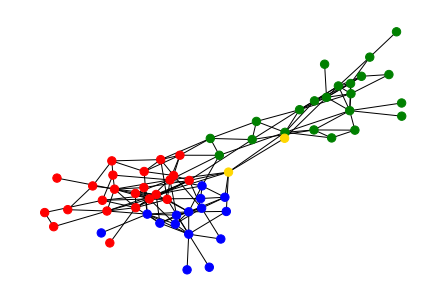

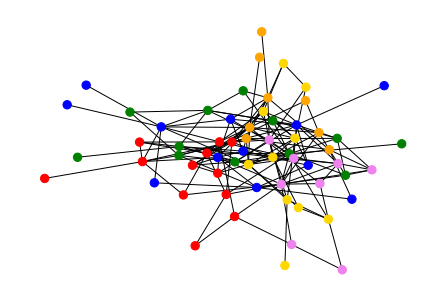

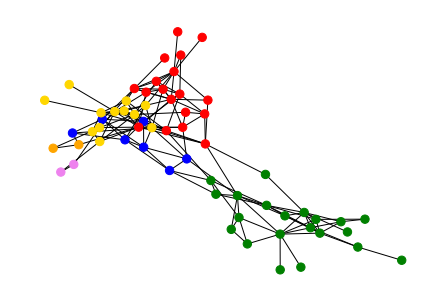

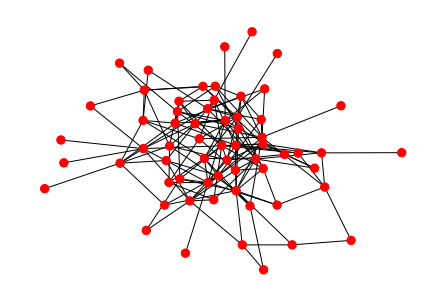

In [9]:
compare_communities(G_dolphins, G_dolphins_rnd)

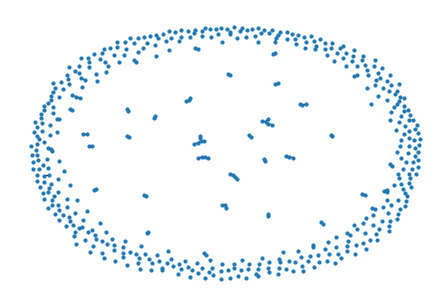

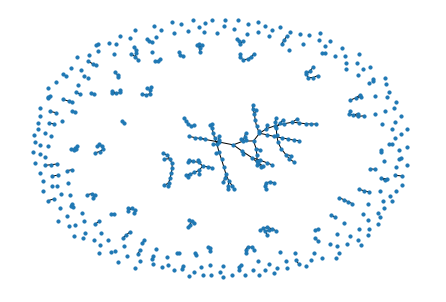

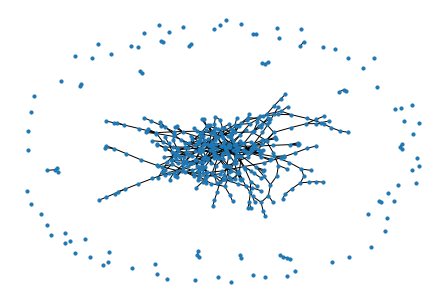

In [10]:
## A 4.02
## Task 1
def visualize_ER_graph(avg_k, n_nodes):
    p = np.true_divide(avg_k, n_nodes)
    G_erg=nx.generators.random_graphs.erdos_renyi_graph(n_nodes, p)
    nx.draw(G_erg, pos=nx.spring_layout(G_erg, scale=2),node_size=10)

figure_index = 10
def new_fig():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

for avg_k in [0.2, 1 ,2]:
    new_fig()
    visualize_ER_graph(avg_k, 500)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


TypeError: _logspace_dispatcher() missing 1 required positional argument: 'stop'

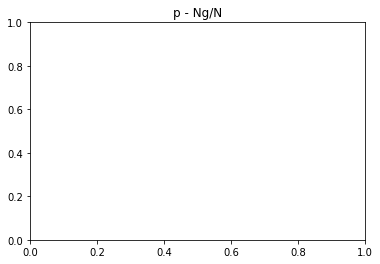

In [16]:
### A4.02 Task 2
def plot_p_NG_N(N):
    x_p = []
    y_NG_N = []
    y_avg_clustering = []
    for i in range(0,N+1):
        p = i/N
        x_p.append(p)

        G_ER = nx.generators.random_graphs.erdos_renyi_graph(N, p)
        clustering = [nx.clustering(G_ER)[n] for n in G_ER]
        y_avg_clustering.append(np.mean(clustering))

        temp_NG_N = []
        for count in range(0,100):
            G_ER = nx.generators.random_graphs.erdos_renyi_graph(N, p)
            largest_nodes = max(nx.connected_components(G_ER), key=len)
            largest_length = len(largest_nodes)
            temp_NG_N.append(np.true_divide(largest_length, N))

        y_NG_N.append(np.mean(temp_NG_N))
    new_fig()
    plt.title("p - Ng/N")
    plt.xticks(np.logspace(np.log(0.01),np.log(100)))
    plt.axvline(x=1/N, color='r')
    plt.plot(x_p,y_NG_N)
    plt.show()

    new_fig()
    plt.xscale("log")
    plt.title("p - avg clustering")
    plt.axvline(x=1/N, color='r')
    plt.plot(x_p, y_avg_clustering)
    plt.show()
# plot_p_NG_N(100)



In [30]:
def generate_ws():
    y_avg_clustering = []
    x_p = []
    y_p = []
    analytical_result = []
    D_p = []
    avg_shortest_path = []
    
    
    for i in range(0, 101):
        p = i/100
        x_p.append(p)
        
        G_sm = nx.watts_strogatz_graph(100, 10, p)
        clustering = [nx.clustering(G_sm)[n] for n in G_sm.nodes()]
        y_avg_clustering.append(np.mean(clustering))
        y_p.append(np.true_divide(y_avg_clustering[i], y_avg_clustering[0]))  
        analytical_result.append((3/2)*((5-1)/(2*5-1)*(1-p)**3) / y_avg_clustering[0])
        D_p.append(nx.average_shortest_path_length(G_sm))
        avg_shortest_path.append(D_p[i] / D_p[0])
        
    avg_shortest_path    
    plt.title("average clustering <C(p)>/<C(0)>")
    plt.xticks(np.logspace(np.log(0.01),np.log(100)))
    plt.plot(x_p, y_p, '-b', label = '<C(p)>/<C(0)>')
    plt.plot(x_p, analytical_result, '-r', label = 'analytical_result')
    plt.plot(x_p, avg_shortest_path, '-g', label = 'avg_shortest_path')
    plt.show()
    
            
            
            

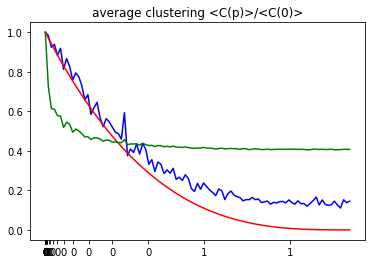

In [31]:
generate_ws()